In [3]:
## basic t-sne tutorial
## tutorial url:
## https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
## https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

## Would like to try this technique on customer segmentation to explore group similarities

 The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function

In [5]:
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

#### Iris

In [6]:
iris = load_iris()
x = iris.data
y = iris.target 

In [7]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387634
[t-SNE] KL divergence after 1000 iterations: 0.129141


[Text(0.5, 1.0, 'T-SNE Iris')]

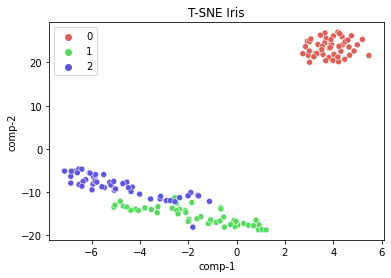

In [8]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="T-SNE Iris") 

#### MNIST

In [9]:
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 

(3000, 28, 28)


In [11]:
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

(3000, 784)


In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.297s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.366180
[t-SNE] KL divergence after 1000 iterations: 1.271638


[Text(0.5, 1.0, 'T-SNE MNIST')]

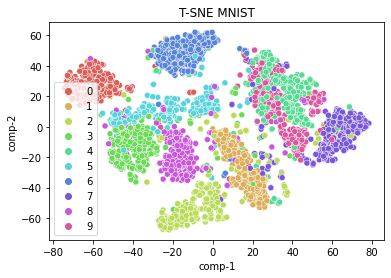

In [17]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="T-SNE MNIST")